In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, KernelPCA

In [2]:
DIR = Path('Tea Score Feature Data').resolve()
DATA_DIR = DIR / 'Color Feature Data'
CLASS_LABEL = ['Score 1', 'Score 2', 'Score 3', 'Score 4']
COLOR_MODE = ['RGB', 'HSV', 'LAB']

In [3]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()
robust_scaler = RobustScaler()

encoder = LabelEncoder()

# RGB Color Feature Data

In [4]:
data_frames = []

for label in CLASS_LABEL:
    rgb_dir = DATA_DIR / label / f'{label}_RGB'
    
    for file_path in rgb_dir.glob('*.csv'):
        df = pd.read_csv(file_path)
        df['class label'] = label
        data_frames.append(df)
    
all_data_frames = pd.concat(data_frames, ignore_index=True)
    
rgb_feature = all_data_frames.drop(columns=['class label']).values
rgb_label = all_data_frames['class label'].values
    
print(rgb_feature.shape)
print(rgb_label.shape)

(5007, 12)
(5007,)


In [8]:
rgb = all_data_frames.drop(columns=['class label'])
correlation_rgb = rgb.corr()
print(correlation_rgb)

            B_mean    G_mean    R_mean     B_std     G_std     R_std  \
B_mean    1.000000 -0.542327 -0.821327  0.808331  0.378751 -0.198291   
G_mean   -0.542327  1.000000  0.881365 -0.440485  0.096640 -0.017312   
R_mean   -0.821327  0.881365  1.000000 -0.668102 -0.195261  0.089826   
B_std     0.808331 -0.440485 -0.668102  1.000000  0.575114 -0.038836   
G_std     0.378751  0.096640 -0.195261  0.575114  1.000000  0.215853   
R_std    -0.198291 -0.017312  0.089826 -0.038836  0.215853  1.000000   
B_median  0.974505 -0.555684 -0.805011  0.765969  0.328763 -0.175639   
G_median -0.555533  0.996657  0.886992 -0.458925  0.083020  0.002933   
R_median -0.824806  0.877898  0.999435 -0.667992 -0.192914  0.115162   
B_mode    0.957131 -0.564402 -0.797271  0.727677  0.290335 -0.179715   
G_mode   -0.569033  0.993649  0.890697 -0.471190  0.078585  0.023726   
R_mode   -0.827092  0.871048  0.996207 -0.667519 -0.186661  0.143771   

          B_median  G_median  R_median    B_mode    G_mode    R

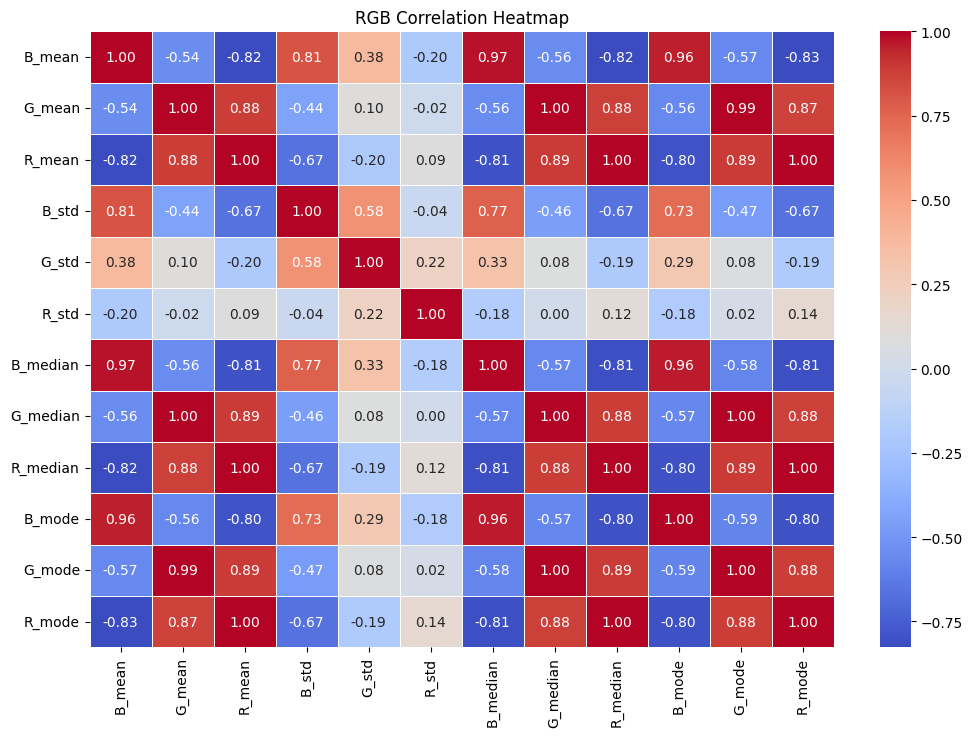

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_rgb, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('RGB Correlation Heatmap')
plt.show()

In [13]:
rgb_feat = rgb.drop(columns=['R_std', 'G_std'])
scaled_rgb_feat = standard_scaler.fit_transform(rgb_feat)

pca = PCA(n_components=10)
principal_components = pca.fit_transform(scaled_rgb_feat)
scaled_rgb_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 10):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 80.24%
explained variance PC2: 14.41%
explained variance PC3: 3.29%
explained variance PC4: 1.40%
explained variance PC5: 0.36%
explained variance PC6: 0.18%
explained variance PC7: 0.06%
explained variance PC8: 0.03%
explained variance PC9: 0.03%
explained variance PC10: 0.00%


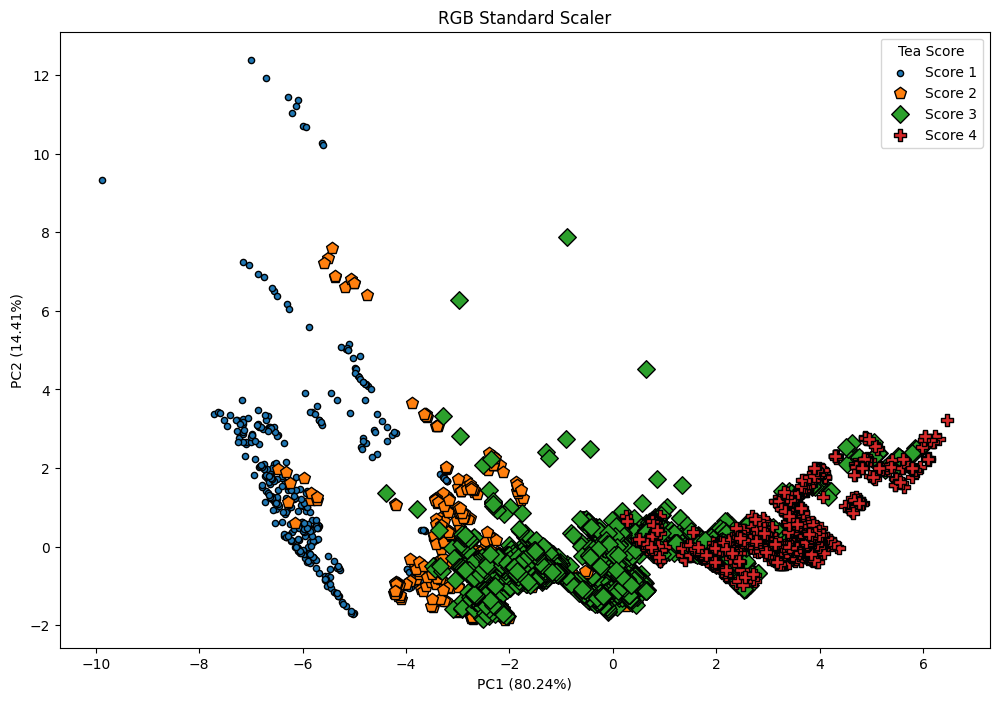

In [14]:
from itertools import cycle

encoded_label_rgb = encoder.fit_transform(rgb_label)

scaled_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = scaled_rgb_pca_df[scaled_rgb_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("RGB Standard Scaler")
plt.legend(title='Tea Score')
plt.show()

## Standard Scaler

In [8]:
standard_scaled_rgb = standard_scaler.fit_transform(rgb_feature)

In [9]:
pca = PCA(n_components=12)
principal_components = pca.fit_transform(standard_scaled_rgb)
standard_rgb_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 67.36%
explained variance PC2: 15.75%
explained variance PC3: 9.83%
explained variance PC4: 3.82%
explained variance PC5: 1.93%
explained variance PC6: 0.79%
explained variance PC7: 0.29%
explained variance PC8: 0.14%
explained variance PC9: 0.04%
explained variance PC10: 0.02%
explained variance PC11: 0.02%
explained variance PC12: 0.00%


## MinMax Scaler

In [10]:
minmaxed_rgb = minmax_scaler.fit_transform(rgb_feature)

In [11]:
pca = PCA(n_components=12)
principal_components = pca.fit_transform(minmaxed_rgb)
minmax_rgb_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 78.31%
explained variance PC2: 10.01%
explained variance PC3: 7.45%
explained variance PC4: 2.03%
explained variance PC5: 1.30%
explained variance PC6: 0.56%
explained variance PC7: 0.16%
explained variance PC8: 0.07%
explained variance PC9: 0.05%
explained variance PC10: 0.04%
explained variance PC11: 0.03%
explained variance PC12: 0.00%


## MaxAbs Scaler

In [12]:
maxed_rgb = maxabs_scaler.fit_transform(rgb_feature)

In [13]:
pca = PCA(n_components=12)
principal_components = pca.fit_transform(maxed_rgb)
maxabs_rgb_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 76.97%
explained variance PC2: 10.25%
explained variance PC3: 8.08%
explained variance PC4: 2.39%
explained variance PC5: 1.31%
explained variance PC6: 0.61%
explained variance PC7: 0.21%
explained variance PC8: 0.09%
explained variance PC9: 0.04%
explained variance PC10: 0.03%
explained variance PC11: 0.02%
explained variance PC12: 0.00%


## Robust Scaler

In [14]:
robust_scaled_rgb = robust_scaler.fit_transform(rgb_feature)

In [15]:
pca = PCA(n_components=12)
principal_components = pca.fit_transform(robust_scaled_rgb)
robust_rgb_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 69.41%
explained variance PC2: 15.13%
explained variance PC3: 7.67%
explained variance PC4: 3.77%
explained variance PC5: 2.67%
explained variance PC6: 0.72%
explained variance PC7: 0.44%
explained variance PC8: 0.13%
explained variance PC9: 0.02%
explained variance PC10: 0.01%
explained variance PC11: 0.01%
explained variance PC12: 0.00%


## RGB PCA Plot

### Standard Scaler

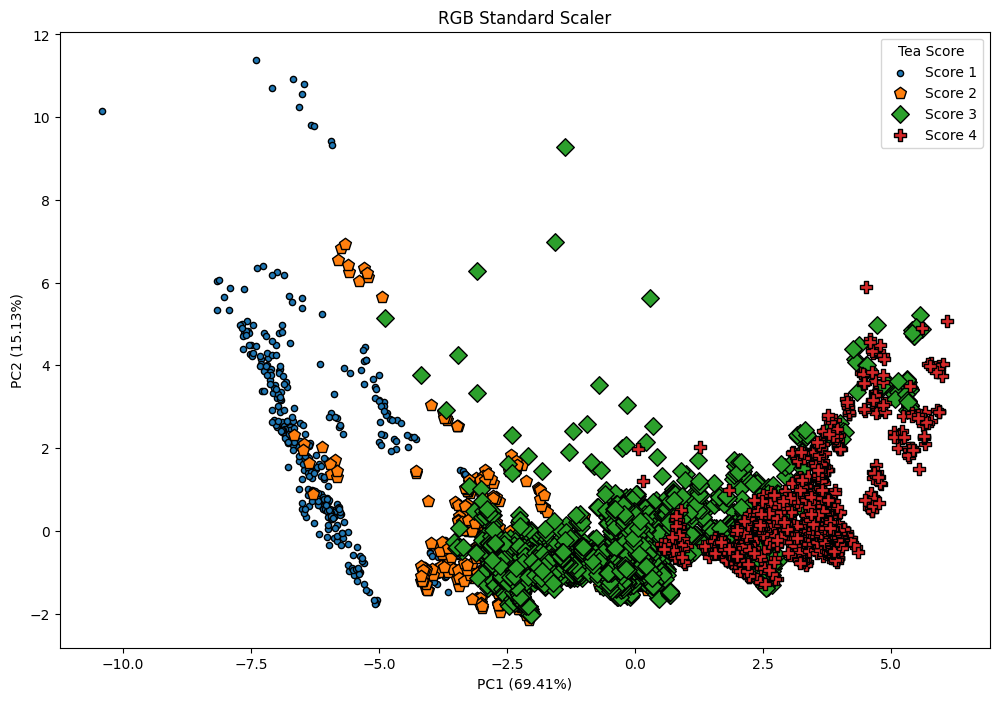

In [16]:
from itertools import cycle

encoded_label_rgb = encoder.fit_transform(rgb_label)

standard_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = standard_rgb_pca_df[standard_rgb_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("RGB Standard Scaler")
plt.legend(title='Tea Score')
plt.show()

### MinMax Scaler

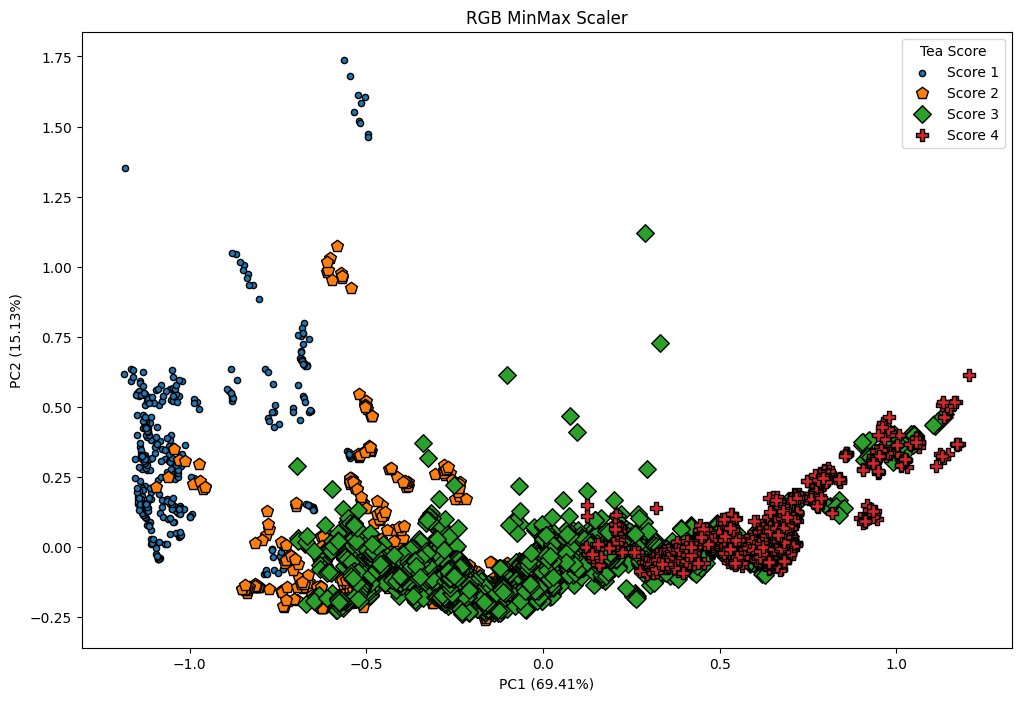

In [17]:
minmax_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_rgb_pca_df[minmax_rgb_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("RGB MinMax Scaler")
plt.legend(title='Tea Score')
plt.show()

### MaxAbs Scaler

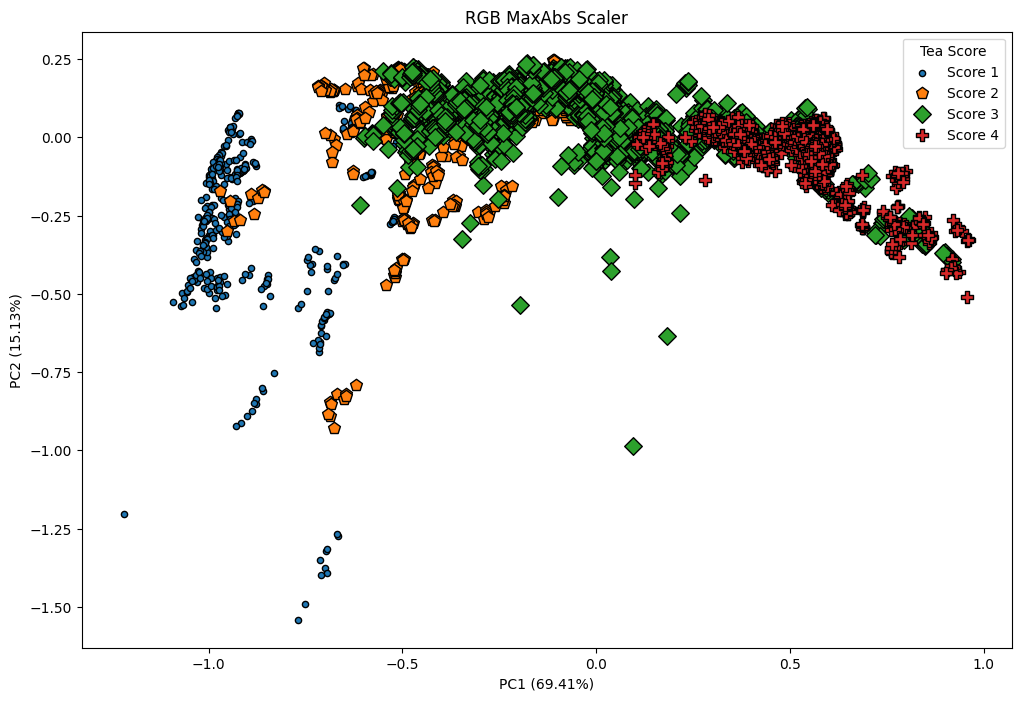

In [18]:
maxabs_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = maxabs_rgb_pca_df[maxabs_rgb_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("RGB MaxAbs Scaler")
plt.legend(title='Tea Score')
plt.show()

### Robust Scaler

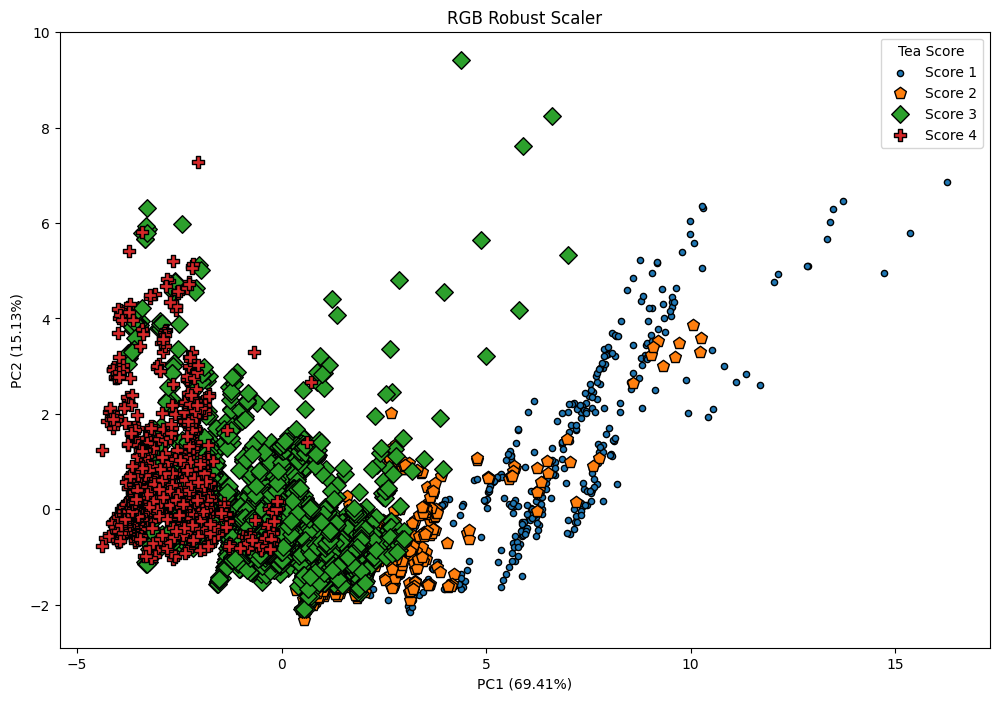

In [19]:
robust_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = robust_rgb_pca_df[robust_rgb_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("RGB Robust Scaler")
plt.legend(title='Tea Score')
plt.show()

In [18]:
kernel_pca = KernelPCA(n_components=12, kernel='rbf', gamma=0.01, fit_inverse_transform=True, alpha=0.1)

kernel_pc = kernel_pca.fit_transform(rgb_feature)
kernel_pca_df = pd.DataFrame(data=kernel_pc, columns=['KPC1', 'KPC2', 'KPC3', 'KPC4', 'KPC5', 'KPC6', 'KPC7', 'KPC8', 'KPC9', 'KPC10', 'KPC11', 'KPC12'])

eigenvalues = kernel_pca.eigenvalues_
kernel_explained_variance = eigenvalues / np.sum(eigenvalues)

for i in range(0,12):
  print(f"explained variance KPC{i+1}: {kernel_explained_variance[i]*100:.2f}%")

explained variance KPC1: 14.27%
explained variance KPC2: 12.30%
explained variance KPC3: 11.18%
explained variance KPC4: 10.02%
explained variance KPC5: 8.67%
explained variance KPC6: 8.51%
explained variance KPC7: 7.98%
explained variance KPC8: 6.38%
explained variance KPC9: 6.00%
explained variance KPC10: 5.55%
explained variance KPC11: 4.64%
explained variance KPC12: 4.50%


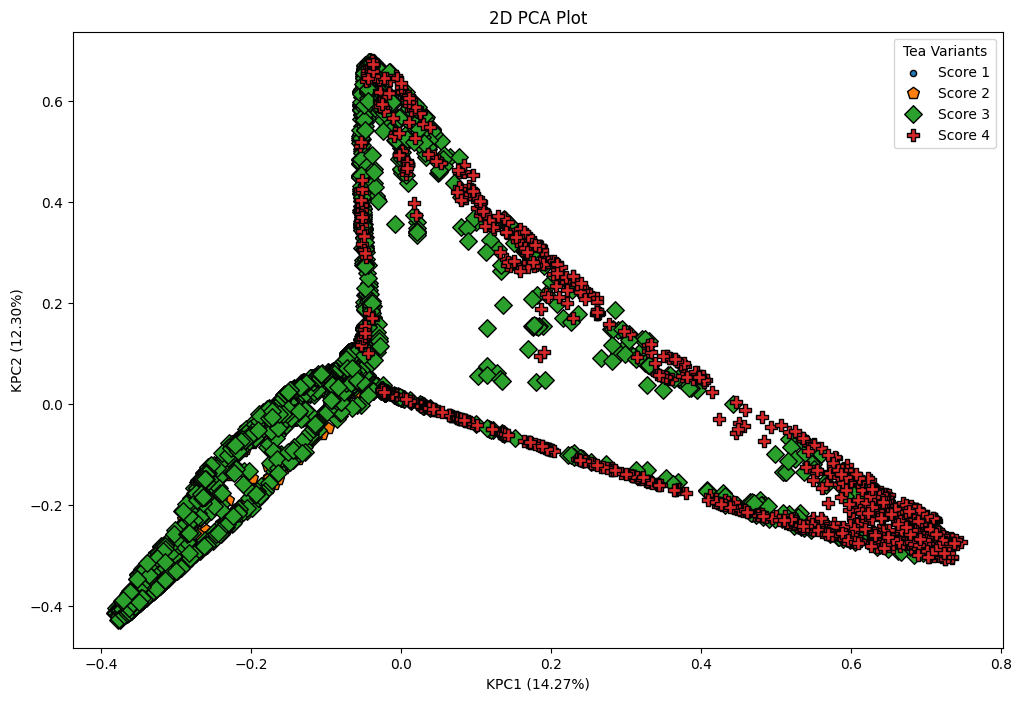

In [19]:
kernel_pca_df['encoded label'] = encoded_label
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X', '^', 's', 'v', 'h']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, variant in enumerate(unique_class):
  subset = kernel_pca_df[kernel_pca_df['encoded label'] == i]
  plt.scatter(subset['KPC1'], subset['KPC2'],
              label=variant,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"KPC1 ({kernel_explained_variance[0]*100:.2f}%)")
plt.ylabel(f"KPC2 ({kernel_explained_variance[1]*100:.2f}%)")
plt.title("2D PCA Plot")
plt.legend(title='Tea Variants')
plt.show()

# HSV Color Feature Data

In [23]:
data_frames = []

for label in CLASS_LABEL:
    rgb_dir = DATA_DIR / label / f'{label}_HSV'
    
    for file_path in rgb_dir.glob('*.csv'):
        df = pd.read_csv(file_path)
        df['class label'] = label
        data_frames.append(df)
    
all_data_frames = pd.concat(data_frames, ignore_index=True)
    
hsv_feature = all_data_frames.drop(columns=['class label']).values
hsv_label = all_data_frames['class label'].values
    
print(hsv_feature.shape)
print(hsv_label.shape)

(5007, 12)
(5007,)


## Standard Scaler

In [24]:
standard_scaled_hsv = standard_scaler.fit_transform(hsv_feature)

In [25]:
pca = PCA(n_components=12)
principal_components = pca.fit_transform(standard_scaled_hsv)
standard_hsv_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 63.92%
explained variance PC2: 19.34%
explained variance PC3: 7.70%
explained variance PC4: 4.39%
explained variance PC5: 2.86%
explained variance PC6: 0.76%
explained variance PC7: 0.69%
explained variance PC8: 0.17%
explained variance PC9: 0.14%
explained variance PC10: 0.02%
explained variance PC11: 0.02%
explained variance PC12: 0.00%


## MinMax Scaler

In [26]:
minmaxed_hsv = minmax_scaler.fit_transform(hsv_feature)

In [27]:
pca = PCA(n_components=12)
principal_components = pca.fit_transform(minmaxed_hsv)
minmax_hsv_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 75.44%
explained variance PC2: 12.47%
explained variance PC3: 7.36%
explained variance PC4: 2.95%
explained variance PC5: 0.76%
explained variance PC6: 0.55%
explained variance PC7: 0.26%
explained variance PC8: 0.08%
explained variance PC9: 0.06%
explained variance PC10: 0.05%
explained variance PC11: 0.01%
explained variance PC12: 0.00%


## MaxAbs Scaler

In [28]:
maxed_hsv = maxabs_scaler.fit_transform(hsv_feature)

In [29]:
pca = PCA(n_components=12)
principal_components = pca.fit_transform(maxed_hsv)
maxabs_hsv_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 76.97%
explained variance PC2: 12.08%
explained variance PC3: 7.13%
explained variance PC4: 2.26%
explained variance PC5: 1.05%
explained variance PC6: 0.21%
explained variance PC7: 0.17%
explained variance PC8: 0.06%
explained variance PC9: 0.05%
explained variance PC10: 0.01%
explained variance PC11: 0.01%
explained variance PC12: 0.00%


## Robust Scaler

In [30]:
robust_scaled_hsv = robust_scaler.fit_transform(hsv_feature)

In [31]:
pca = PCA(n_components=12)
principal_components = pca.fit_transform(robust_scaled_hsv)
robust_hsv_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 75.48%
explained variance PC2: 15.71%
explained variance PC3: 3.08%
explained variance PC4: 2.13%
explained variance PC5: 1.91%
explained variance PC6: 1.00%
explained variance PC7: 0.35%
explained variance PC8: 0.27%
explained variance PC9: 0.03%
explained variance PC10: 0.03%
explained variance PC11: 0.01%
explained variance PC12: 0.00%


## HSV PCA Plot

### Standard Scaler

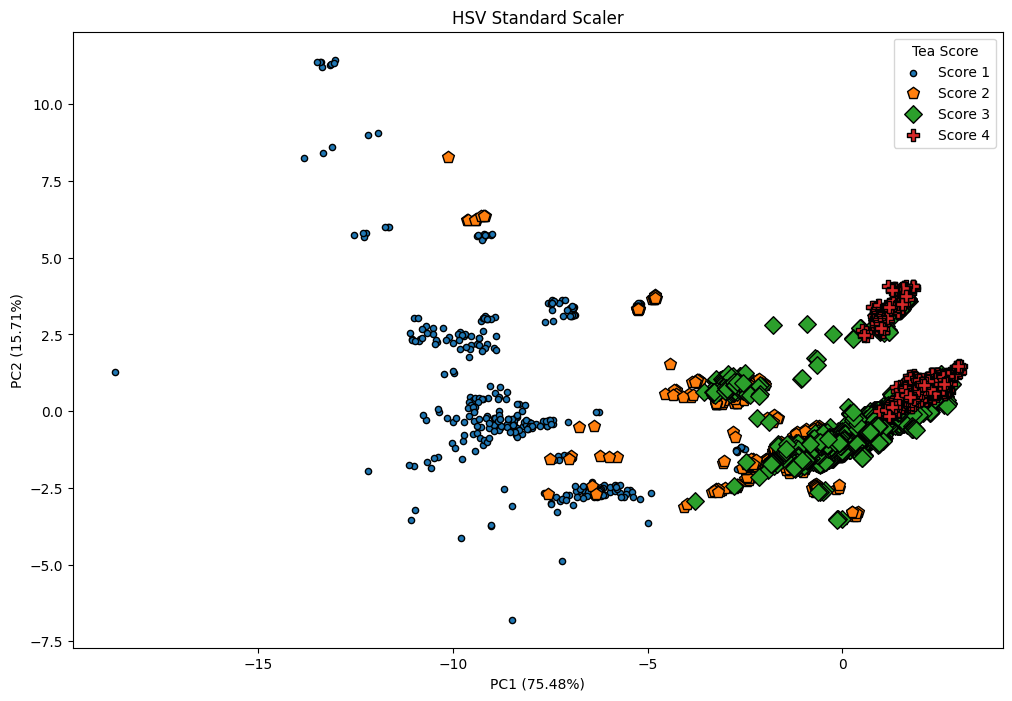

In [32]:
encoded_label_hsv = encoder.fit_transform(hsv_label)

standard_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = standard_hsv_pca_df[standard_hsv_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("HSV Standard Scaler")
plt.legend(title='Tea Score')
plt.show()

### MinMax Scaler

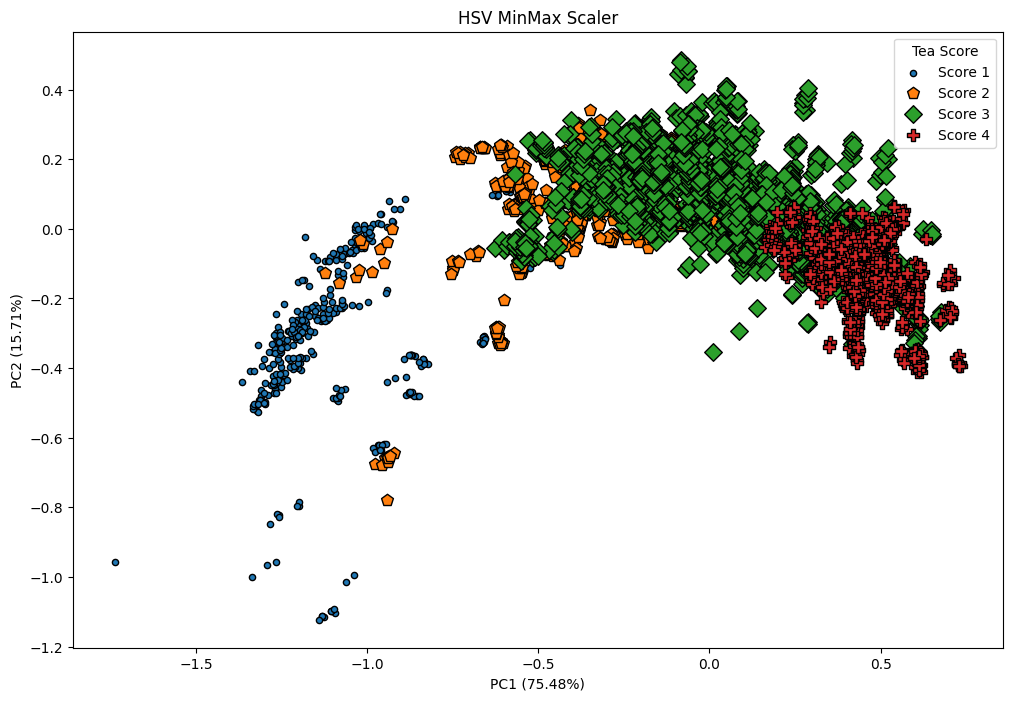

In [33]:
minmax_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_hsv_pca_df[minmax_hsv_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("HSV MinMax Scaler")
plt.legend(title='Tea Score')
plt.show()

### MaxAbs Scaler

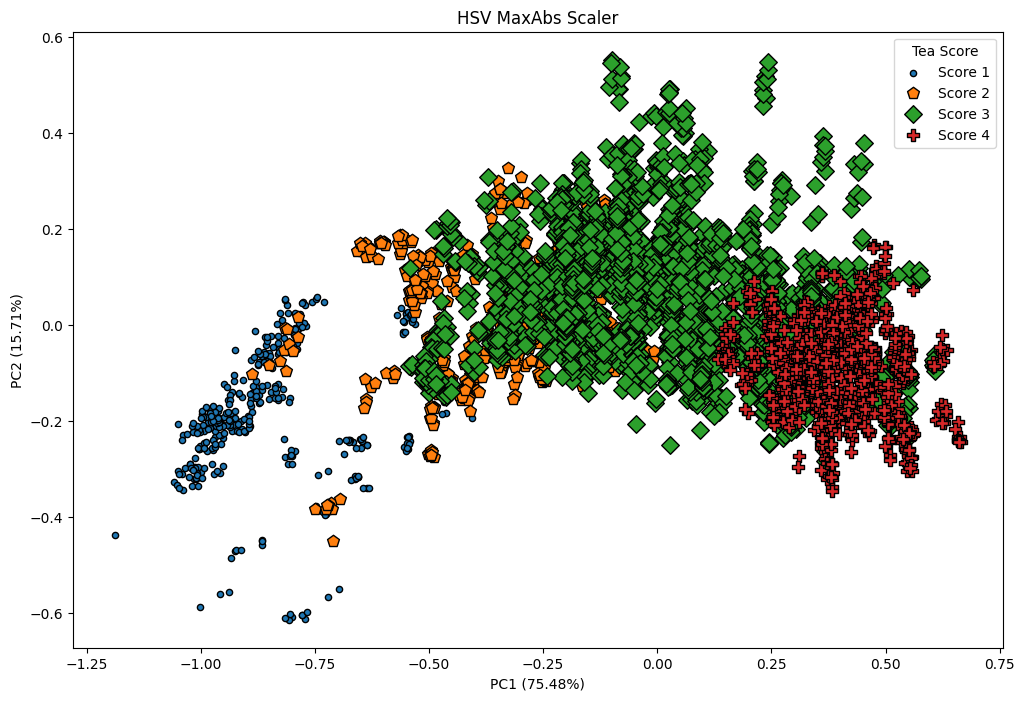

In [35]:
maxabs_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = maxabs_hsv_pca_df[maxabs_hsv_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("HSV MaxAbs Scaler")
plt.legend(title='Tea Score')
plt.show()

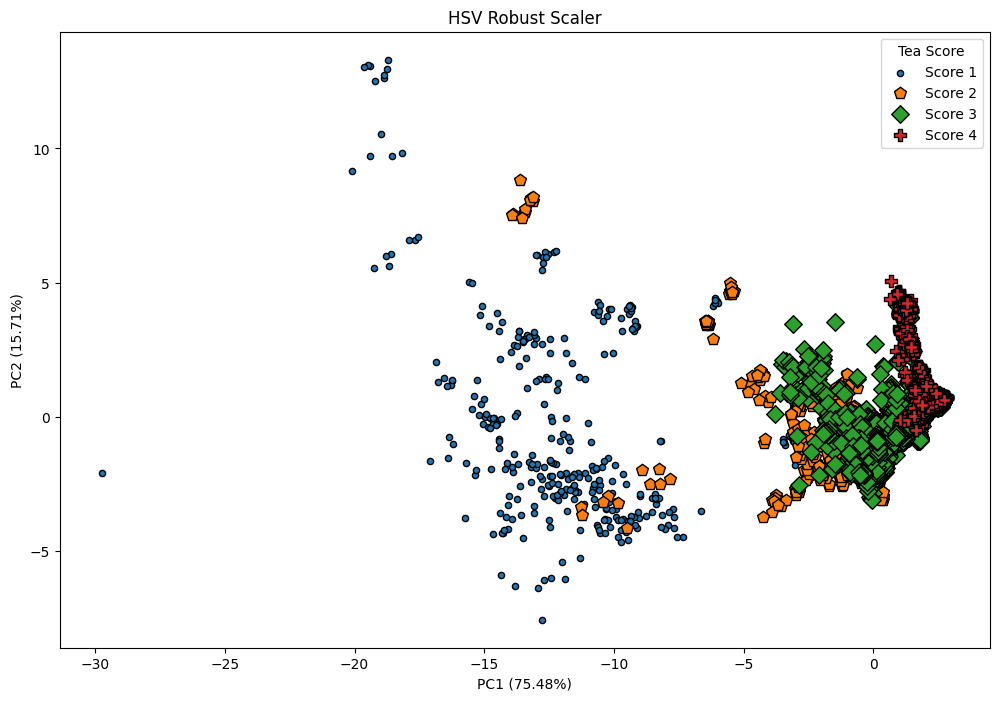

In [36]:
robust_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = robust_hsv_pca_df[robust_hsv_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("HSV Robust Scaler")
plt.legend(title='Tea Score')
plt.show()

# LAB Color Feature Data

In [37]:
data_frames = []

for label in CLASS_LABEL:
    rgb_dir = DATA_DIR / label / f'{label}_LAB'
    
    for file_path in rgb_dir.glob('*.csv'):
        df = pd.read_csv(file_path)
        df['class label'] = label
        data_frames.append(df)
    
all_data_frames = pd.concat(data_frames, ignore_index=True)
    
lab_feature = all_data_frames.drop(columns=['class label']).values
lab_label = all_data_frames['class label'].values
    
print(lab_feature.shape)
print(lab_label.shape)

(5007, 12)
(5007,)


## Standard Scaler

In [38]:
standard_scaled_lab = standard_scaler.fit_transform(lab_feature)

In [39]:
pca = PCA(n_components=12)
principal_components = pca.fit_transform(standard_scaled_lab)
standard_lab_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 75.49%
explained variance PC2: 23.38%
explained variance PC3: 0.64%
explained variance PC4: 0.30%
explained variance PC5: 0.09%
explained variance PC6: 0.04%
explained variance PC7: 0.03%
explained variance PC8: 0.01%
explained variance PC9: 0.01%
explained variance PC10: 0.01%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


## MinMax Scaler

In [40]:
minmaxed_lab = minmax_scaler.fit_transform(lab_feature)

In [41]:
pca = PCA(n_components=12)
principal_components = pca.fit_transform(minmaxed_lab)
minmax_lab_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 85.82%
explained variance PC2: 13.35%
explained variance PC3: 0.45%
explained variance PC4: 0.18%
explained variance PC5: 0.07%
explained variance PC6: 0.05%
explained variance PC7: 0.04%
explained variance PC8: 0.01%
explained variance PC9: 0.01%
explained variance PC10: 0.01%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


## MaxAbs Scaler

In [42]:
maxed_lab = maxabs_scaler.fit_transform(lab_feature)

In [43]:
pca = PCA(n_components=12)
principal_components = pca.fit_transform(maxed_lab)
maxabs_lab_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 73.07%
explained variance PC2: 25.82%
explained variance PC3: 0.68%
explained variance PC4: 0.29%
explained variance PC5: 0.06%
explained variance PC6: 0.04%
explained variance PC7: 0.01%
explained variance PC8: 0.01%
explained variance PC9: 0.00%
explained variance PC10: 0.00%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


## Robust Scaler

In [44]:
robust_scaled_lab = robust_scaler.fit_transform(lab_feature)

In [45]:
pca = PCA(n_components=12)
principal_components = pca.fit_transform(robust_scaled_lab)
robust_lab_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 70.66%
explained variance PC2: 28.05%
explained variance PC3: 0.76%
explained variance PC4: 0.34%
explained variance PC5: 0.09%
explained variance PC6: 0.04%
explained variance PC7: 0.03%
explained variance PC8: 0.01%
explained variance PC9: 0.01%
explained variance PC10: 0.01%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


## LAB PCA Plot

### Standard Scaler

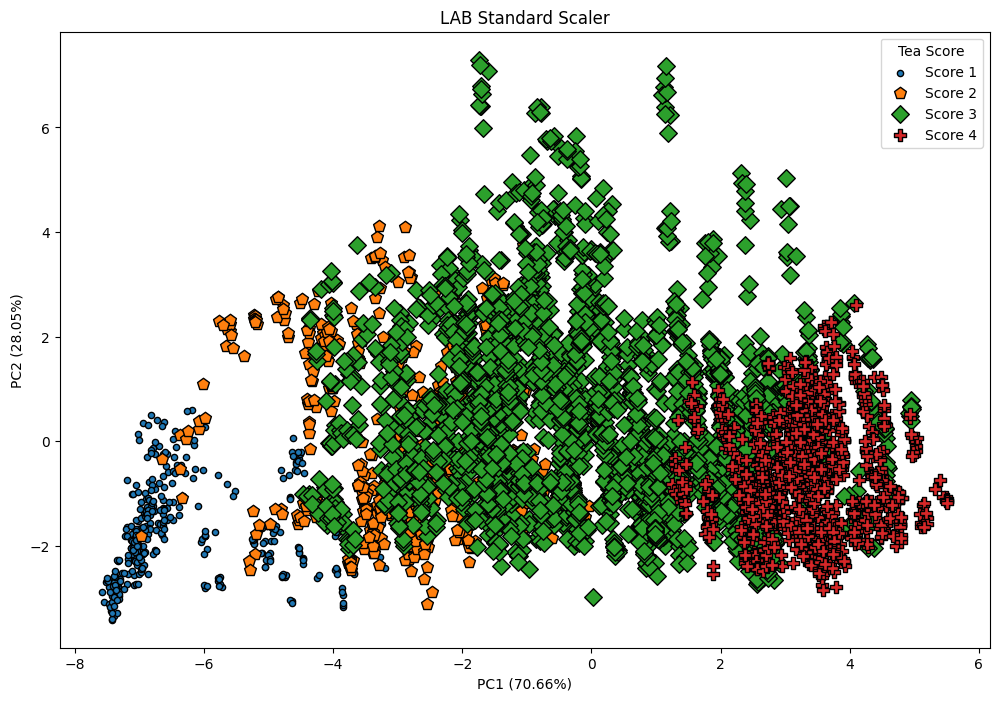

In [46]:
encoded_label_lab = encoder.fit_transform(lab_label)

standard_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = standard_lab_pca_df[standard_lab_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("LAB Standard Scaler")
plt.legend(title='Tea Score')
plt.show()

### MinMax Scaler

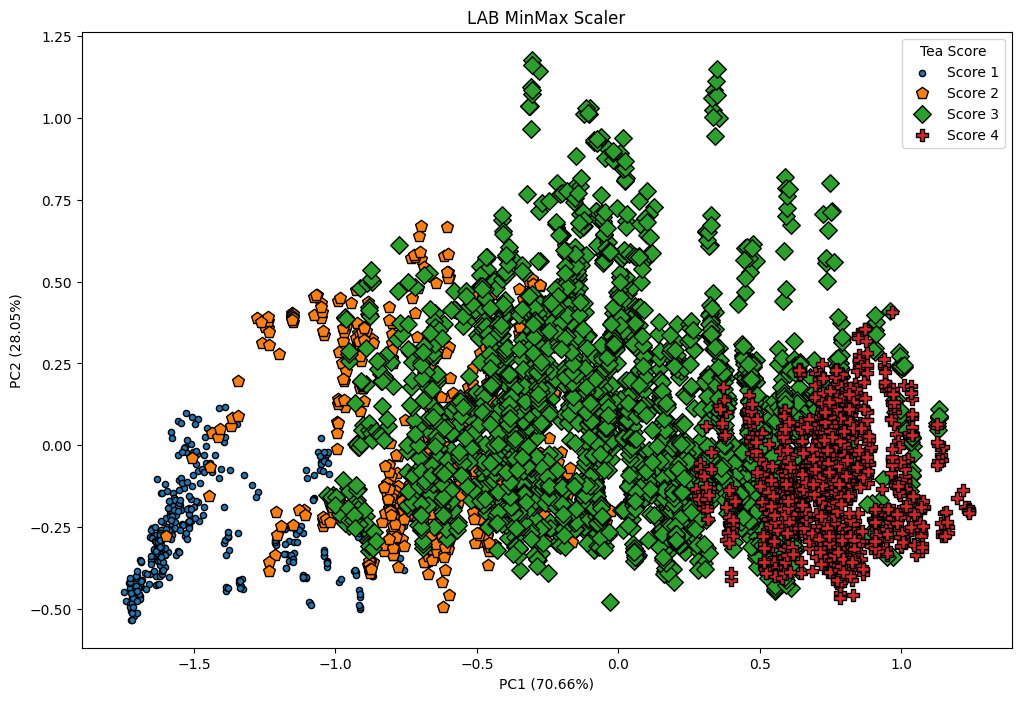

In [47]:
minmax_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_lab_pca_df[minmax_lab_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("LAB MinMax Scaler")
plt.legend(title='Tea Score')
plt.show()

### MaxAbs Scaler

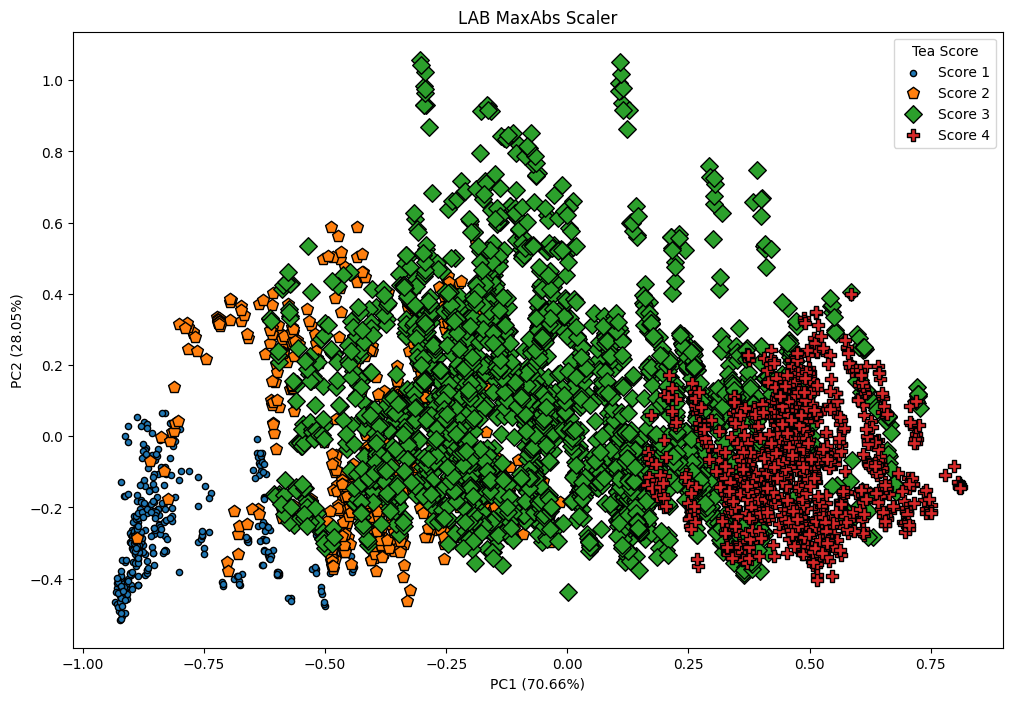

In [48]:
maxabs_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = maxabs_lab_pca_df[maxabs_lab_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("LAB MaxAbs Scaler")
plt.legend(title='Tea Score')
plt.show()

### Robust Scaler

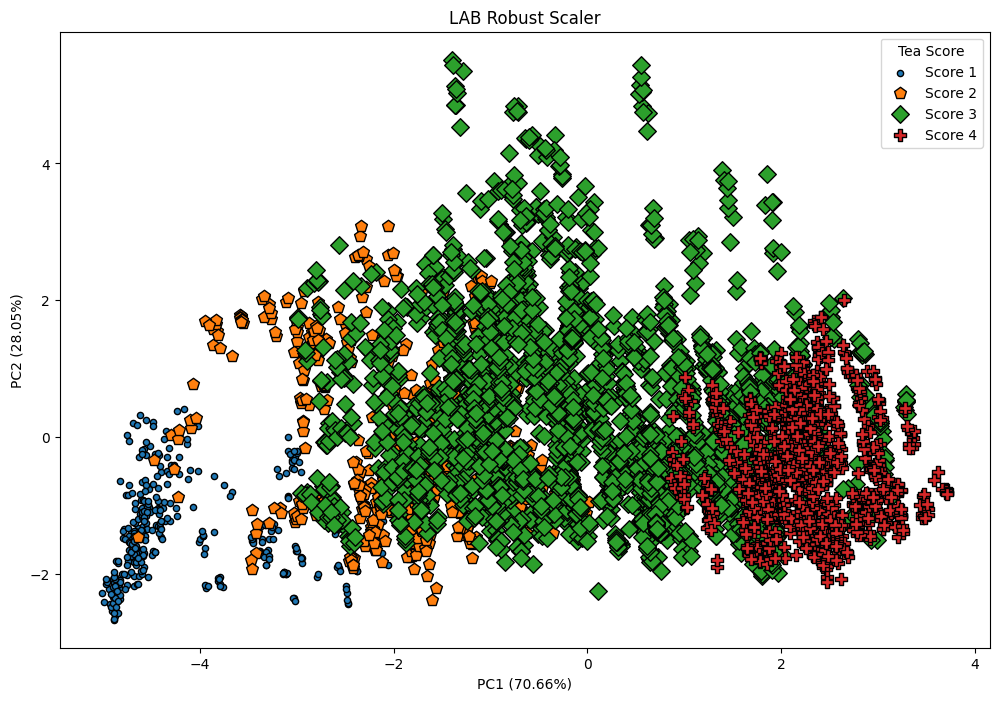

In [49]:
robust_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = robust_lab_pca_df[robust_lab_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("LAB Robust Scaler")
plt.legend(title='Tea Score')
plt.show()

# All Color Data

In [46]:
all_color_features = np.hstack([rgb_feature, hsv_feature, lab_feature])
all_color_df = pd.DataFrame(all_color_features)

print(all_color_df)

            0          1           2         3         4          5    6   \
0     2.927332  10.670465   70.979183  0.960599  0.677387   2.811305  3.0   
1     1.975395  10.234968   75.835949  0.850523  0.647454   3.710779  2.0   
2     3.171722  10.783779   70.704778  0.961749  0.727043   2.790077  3.0   
3     2.054620  10.198173   75.519687  0.991180  0.710972   3.131335  2.0   
4     1.976732  10.105071   75.366903  0.955030  0.730971   3.534794  2.0   
...        ...        ...         ...       ...       ...        ...  ...   
5002  0.553936  28.693223  194.080275  0.703199  2.430438   5.743259  0.0   
5003  0.565108  28.091957  193.317631  0.717986  2.028927   5.546960  0.0   
5004  0.589235  28.119649  192.825095  0.738723  1.924548   5.267911  0.0   
5005  0.539358  26.250660  190.257408  0.719061  1.957037   8.053665  0.0   
5006  0.918770  26.325047  184.036413  0.955409  3.323636  12.343624  1.0   

        7      8    9   ...          26        27        28        29     3

## Standard Scaler

In [47]:
standard_scaled_all = standard_scaler.fit_transform(all_color_df)

In [48]:
pca = PCA(n_components=36)
principal_components = pca.fit_transform(standard_scaled_all)

columns = []
for i in range(0, 36):
    elements = f'PC{i+1}'
    columns.append(elements)

standard_all_pca_df = pd.DataFrame(data=principal_components, columns=columns)
explained_variance = pca.explained_variance_ratio_
for i in range(0, 36):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 65.49%
explained variance PC2: 15.94%
explained variance PC3: 10.53%
explained variance PC4: 2.72%
explained variance PC5: 1.77%
explained variance PC6: 1.26%
explained variance PC7: 0.65%
explained variance PC8: 0.62%
explained variance PC9: 0.34%
explained variance PC10: 0.18%
explained variance PC11: 0.11%
explained variance PC12: 0.09%
explained variance PC13: 0.06%
explained variance PC14: 0.05%
explained variance PC15: 0.05%
explained variance PC16: 0.05%
explained variance PC17: 0.02%
explained variance PC18: 0.02%
explained variance PC19: 0.01%
explained variance PC20: 0.01%
explained variance PC21: 0.01%
explained variance PC22: 0.01%
explained variance PC23: 0.01%
explained variance PC24: 0.01%
explained variance PC25: 0.00%
explained variance PC26: 0.00%
explained variance PC27: 0.00%
explained variance PC28: 0.00%
explained variance PC29: 0.00%
explained variance PC30: 0.00%
explained variance PC31: 0.00%
explained variance PC32: 0.00%
explained vari

## MinMax Scaler

In [49]:
minmaxed_all_color = minmax_scaler.fit_transform(all_color_df)

In [50]:
pca = PCA(n_components=36)
principal_components = pca.fit_transform(minmaxed_all_color)

columns = []
for i in range(0, 36):
    elements = f'PC{i+1}'
    columns.append(elements)

minmax_all_pca_df = pd.DataFrame(data=principal_components, columns=columns)
explained_variance = pca.explained_variance_ratio_
for i in range(0, 36):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 80.51%
explained variance PC2: 11.17%
explained variance PC3: 5.11%
explained variance PC4: 0.99%
explained variance PC5: 0.77%
explained variance PC6: 0.40%
explained variance PC7: 0.30%
explained variance PC8: 0.20%
explained variance PC9: 0.13%
explained variance PC10: 0.09%
explained variance PC11: 0.05%
explained variance PC12: 0.04%
explained variance PC13: 0.04%
explained variance PC14: 0.04%
explained variance PC15: 0.03%
explained variance PC16: 0.02%
explained variance PC17: 0.02%
explained variance PC18: 0.01%
explained variance PC19: 0.01%
explained variance PC20: 0.01%
explained variance PC21: 0.01%
explained variance PC22: 0.01%
explained variance PC23: 0.01%
explained variance PC24: 0.01%
explained variance PC25: 0.01%
explained variance PC26: 0.00%
explained variance PC27: 0.00%
explained variance PC28: 0.00%
explained variance PC29: 0.00%
explained variance PC30: 0.00%
explained variance PC31: 0.00%
explained variance PC32: 0.00%
explained varia

## MaxAbs Scaler

In [51]:
maxed_all_color = maxabs_scaler.fit_transform(all_color_df)

In [52]:
pca = PCA(n_components=36)
principal_components = pca.fit_transform(maxed_all_color)

columns = []
for i in range(0, 36):
    elements = f'PC{i+1}'
    columns.append(elements)

maxabs_all_pca_df = pd.DataFrame(data=principal_components, columns=columns)
explained_variance = pca.explained_variance_ratio_
for i in range(0, 36):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 75.12%
explained variance PC2: 15.36%
explained variance PC3: 5.57%
explained variance PC4: 1.23%
explained variance PC5: 1.06%
explained variance PC6: 0.48%
explained variance PC7: 0.36%
explained variance PC8: 0.22%
explained variance PC9: 0.18%
explained variance PC10: 0.09%
explained variance PC11: 0.07%
explained variance PC12: 0.05%
explained variance PC13: 0.04%
explained variance PC14: 0.04%
explained variance PC15: 0.03%
explained variance PC16: 0.02%
explained variance PC17: 0.01%
explained variance PC18: 0.01%
explained variance PC19: 0.01%
explained variance PC20: 0.01%
explained variance PC21: 0.01%
explained variance PC22: 0.00%
explained variance PC23: 0.00%
explained variance PC24: 0.00%
explained variance PC25: 0.00%
explained variance PC26: 0.00%
explained variance PC27: 0.00%
explained variance PC28: 0.00%
explained variance PC29: 0.00%
explained variance PC30: 0.00%
explained variance PC31: 0.00%
explained variance PC32: 0.00%
explained varia

## Robust Scaler

In [53]:
robust_scaled_all_color = robust_scaler.fit_transform(all_color_df)

In [54]:
pca = PCA(n_components=36)
principal_components = pca.fit_transform(robust_scaled_all_color)

columns = []
for i in range(0, 36):
    elements = f'PC{i+1}'
    columns.append(elements)

robust_all_pca_df = pd.DataFrame(data=principal_components, columns=columns)
explained_variance = pca.explained_variance_ratio_
for i in range(0, 36):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 66.90%
explained variance PC2: 14.21%
explained variance PC3: 7.85%
explained variance PC4: 3.64%
explained variance PC5: 2.77%
explained variance PC6: 1.77%
explained variance PC7: 1.03%
explained variance PC8: 0.79%
explained variance PC9: 0.26%
explained variance PC10: 0.24%
explained variance PC11: 0.18%
explained variance PC12: 0.11%
explained variance PC13: 0.08%
explained variance PC14: 0.04%
explained variance PC15: 0.04%
explained variance PC16: 0.03%
explained variance PC17: 0.02%
explained variance PC18: 0.01%
explained variance PC19: 0.01%
explained variance PC20: 0.01%
explained variance PC21: 0.01%
explained variance PC22: 0.00%
explained variance PC23: 0.00%
explained variance PC24: 0.00%
explained variance PC25: 0.00%
explained variance PC26: 0.00%
explained variance PC27: 0.00%
explained variance PC28: 0.00%
explained variance PC29: 0.00%
explained variance PC30: 0.00%
explained variance PC31: 0.00%
explained variance PC32: 0.00%
explained varia

## All Color PCA Plot

### Standard Scaler

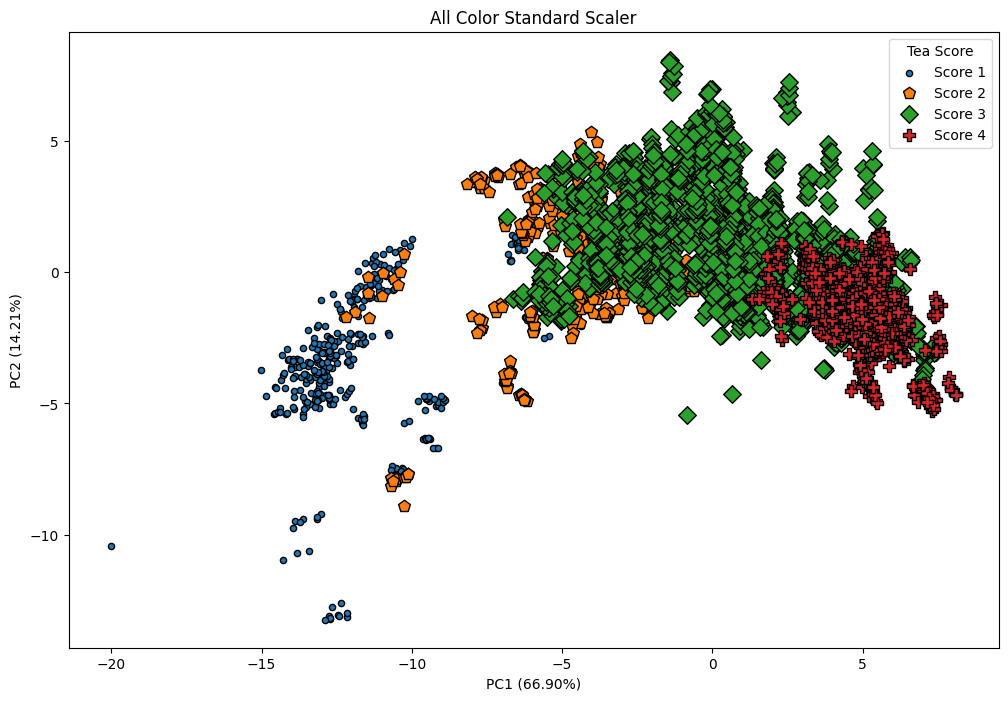

In [55]:
standard_all_pca_df['encoded label'] = encoded_label
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = standard_all_pca_df[standard_all_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("All Color Standard Scaler")
plt.legend(title='Tea Score')
plt.show()

### MinMax Scaler

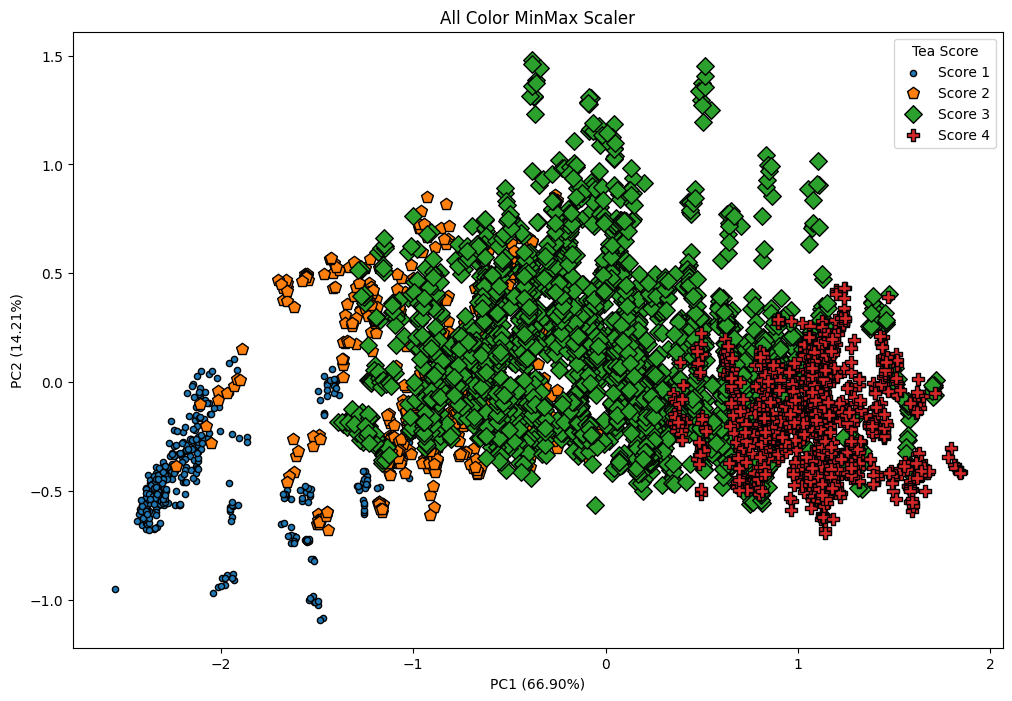

In [56]:
minmax_all_pca_df['encoded label'] = encoded_label
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_all_pca_df[minmax_all_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("All Color MinMax Scaler")
plt.legend(title='Tea Score')
plt.show()

### MaxAbs Scaler

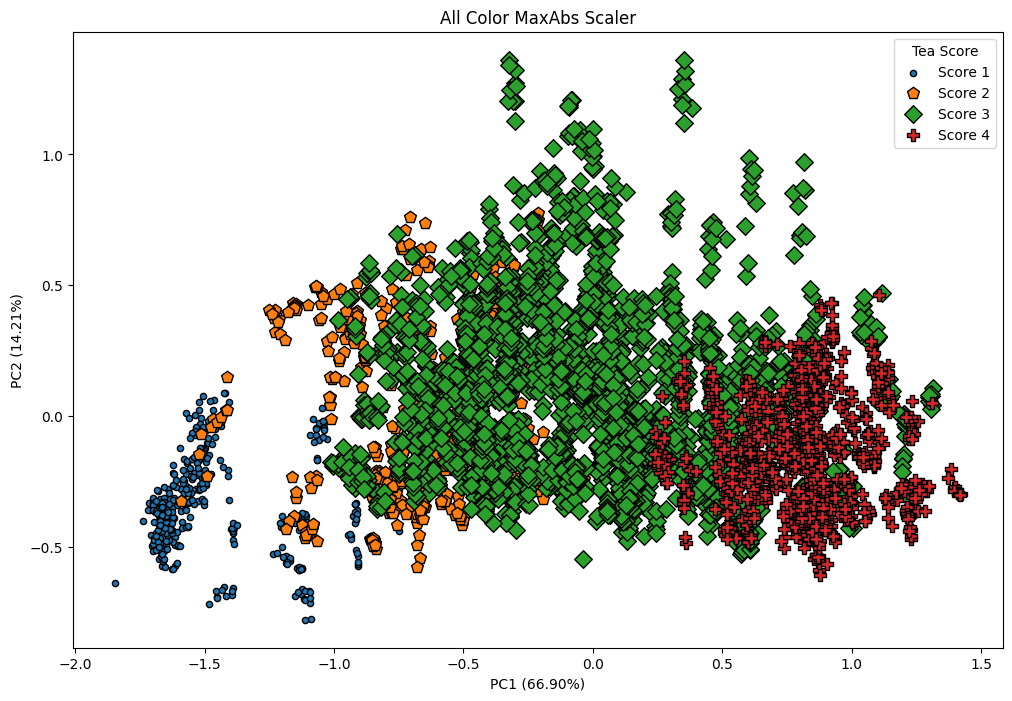

In [57]:
maxabs_all_pca_df['encoded label'] = encoded_label
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = maxabs_all_pca_df[maxabs_all_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("All Color MaxAbs Scaler")
plt.legend(title='Tea Score')
plt.show()

### Robust Scaler

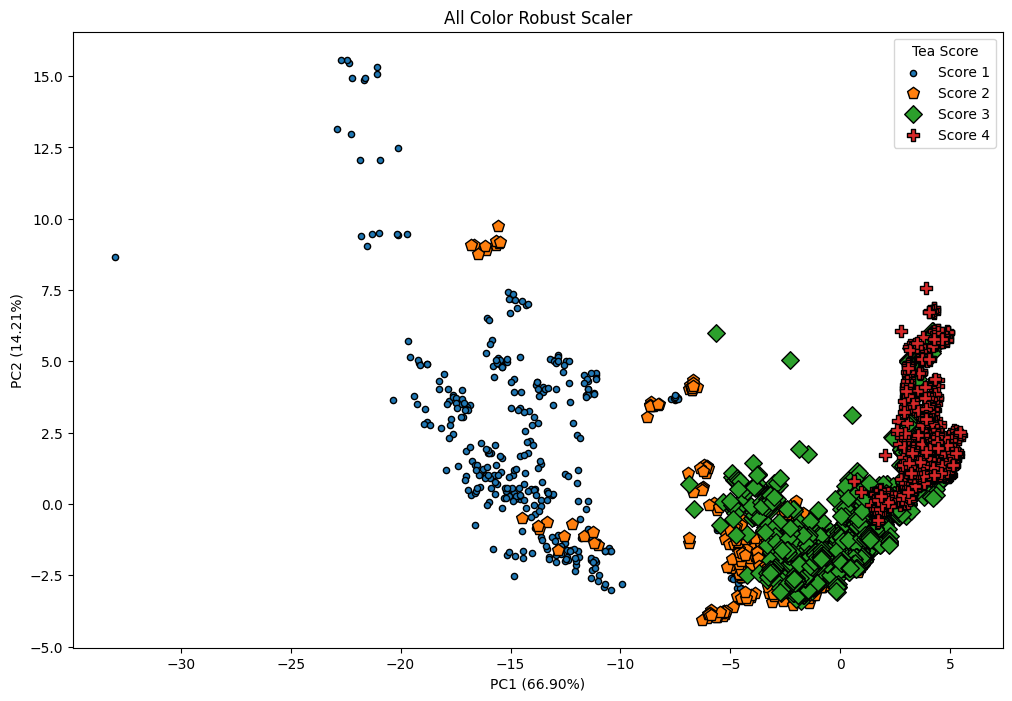

In [58]:
robust_all_pca_df['encoded label'] = encoded_label
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = robust_all_pca_df[robust_all_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("All Color Robust Scaler")
plt.legend(title='Tea Score')
plt.show()